Import libraries and data

In [1]:
#Libraries
import pandas as pd
import numpy as np

In [2]:
!pip install pmdarima

In [3]:
#Data
df = pd.read_csv(r"C:\Users\Alvaro\Desktop\Data Sc/Forecasting Models and Time Series for Business in Python/Daily Bike Sharing.csv", 
                 index_col = "dteday", 
                 parse_dates = True)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Select variables
dataset = df.loc[:,["cnt", "holiday", "workingday", "weathersit", "temp", "atemp",
                   "hum", "windspeed"]]
dataset.head(1)

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


Data transformation

In [5]:
#Renaming variable
dataset = dataset.rename(columns = {"cnt" : "y"})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [6]:
#index
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [7]:
#freq = None - significa que para Python los intervalos no nos frecuentes con el tiempo, esto no es cierto así que necesitamos corregir el parámetro freq
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

Visualization

<AxesSubplot:xlabel='dteday'>

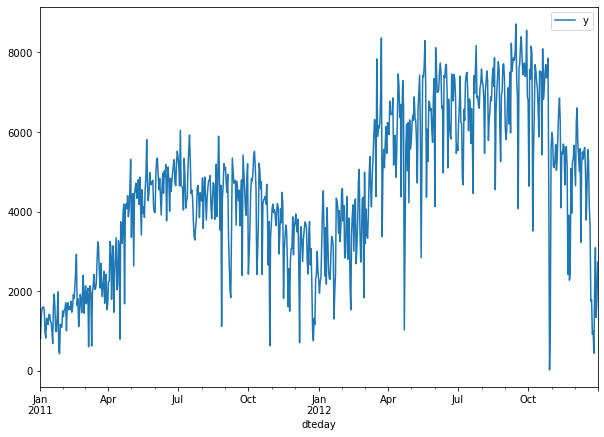

In [8]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

Stationarity

In [10]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(dataset["y"])
print("Augmented Dickey Fuller p-values: %F" % stationarity[1])

Augmented Dickey Fuller p-values: 0.342743


Training and test Set

In [11]:
#Training and test set ( test van a ser los últimos 31 días del dataset)
test_days = 31
training_set = dataset.iloc[:-test_days, :] #todo menos los últimos 31 días
test_set = dataset.iloc[-test_days:, :]

SARIMAX


In [12]:
#exogenous variables
train_exog = training_set.iloc[:, 1:]
test_exog = test_set.iloc[:,1:]
test_exog.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,
2012-12-01,0,0,2,0.298333,0.316904,0.806667,0.059704
2012-12-02,0,0,2,0.347500,0.359208,0.823333,0.124379
2012-12-03,0,1,1,0.452500,0.455796,0.767500,0.082721
2012-12-04,0,1,1,0.475833,0.469054,0.733750,0.174129
2012-12-05,0,1,1,0.438333,0.428012,0.485000,0.324021


factors to optimize in ARIMA (p, d, q)
    p - Order of the Autoregressive (número de términos desconocidos que multiplican la señal)
    d - Degree of first differencing involved (Número de diferencias que hacen la serie temporal estacionaria)
    q - Order of the moving Average part (Número de términos desconocidos que multiplican los errores de la serie temporal)
    
Hay funciones para optimizar los factores automáticamente


In [13]:
#Libraries
from pmdarima import auto_arima

In [14]:
#Forecasting model
model = auto_arima(y = training_set["y"],
                  x = train_exog,
                  m = 7,
                  seasonal = True,
                  stepwise = False)

In [15]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  700
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood               -5750.577
Date:                                Sat, 31 Dec 2022   AIC                          11515.154
Time:                                        13:30:18   BIC                          11547.001
Sample:                                    01-01-2011   HQIC                         11527.465
                                         - 11-30-2012                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4436      0.808      0.549      0.583      -1.139       2.026
ar.L1          0.3311      0.036      9.309      0.000       0.261       0.401
ma.L1         -0.9112      0.019    -46.812      0.000      -0.949      -0.873
ar.S.L7        0.8634      0.084     10.228      0.000       0.698       1.029
ma.S.L7       -0.8684      0.090     -9.647      0.000      -1.045      -0.692
ma.S.L14       0.0785      0.040      1.941      0.052      -0.001       0.158
sigma2      8.157e+05    2.6e+04     31.405      0.000    7.65e+05    8.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              1292.27
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               3.73   Skew:                            -1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
#Predictions
predictions_sarimax = pd.Series(model.predict(n_periods = test_days,
                             X = test_exog)).rename("SARIMAX")
predictions_sarimax.index = test_set.index
predictions_sarimax

dteday
2012-12-01    5280.390223
2012-12-02    4774.341571
2012-12-03    4596.803196
2012-12-04    4545.120633
2012-12-05    4835.172230
2012-12-06    4640.268346
2012-12-07    4762.156764
2012-12-08    4711.528309
2012-12-09    4454.080984
2012-12-10    4574.215724
2012-12-11    4460.470358
2012-12-12    4785.070739
2012-12-13    4622.128092
2012-12-14    4755.142264
2012-12-15    4674.221103
2012-12-16    4440.059945
2012-12-17    4540.298478
2012-12-18    4441.376890
2012-12-19    4721.851853
2012-12-20    4581.676143
2012-12-21    4697.136686
2012-12-22    4627.914248
2012-12-23    4426.392163
2012-12-24    4513.601596
2012-12-25    4428.853123
2012-12-26    4671.684164
2012-12-27    4551.316532
2012-12-28    4651.670763
2012-12-29    4592.565765
2012-12-30    4419.230423
2012-12-31    4495.192060
Freq: D, Name: SARIMAX, dtype: float64

<AxesSubplot:xlabel='dteday'>

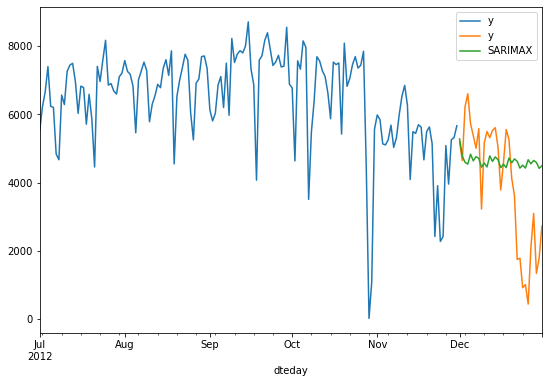

In [20]:
#Visualization
training_set["y"]["2012-07-01":].plot(figsize = (9, 6), legend = True)
test_set["y"].plot(legend = True)
predictions_sarimax.plot(legend = True)

Model assessment

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set["y"], predictions_sarimax),0))
print(round(np.sqrt(mean_squared_error(test_set["y"], predictions_sarimax)),0))

1435.0
1832.0


In [22]:
#MAPE function
def MAPE (y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100
MAPE(test_set["y"], predictions_sarimax)

94.7357667976656

Export forecast

In [38]:
#predictions_X.to_csv("3_predictions_X.csv", index = True)